# Cheatsheet (progmatisch)
>## <ins>Table of contents</ins> <a name="up"></a>[<sup>[1]</sup>](#cite_note-1)
>* [**1. Allgemein**](#1.)
>* [**K2. Überwachtes Lernen**](#K2)
    * [**2.1. Lineare Regression**](#2.1.)
    * [**2.2. logistische Regression**](#2.2.)
    * [**2.3. SVM**](#2.3.)
    * [**2.4. KNN**](#2.4.)
    * [**2.5. Bayes**](#2.5.)
>* [**K3. Motivation und Grundlagen**](#K3)
>* [**K4. Motivation und Grundlagen**](#K4)
>* [**K5. Motivation und Grundlagen**](#K5)
    * [**5.1. RNN**](#5.1.)
       * [**5.1. RNN**](#5.1.)
    * [**5.3. RNN**](#5.3.)
       * [**spaltenweise Konkatenation zweier Matrizen**](#5.3.1.)
       * [**One-Hot-Codierung**](#5.3.2.)
       * [**Berechnungsgraphen**](#5.3.3.)

>


In [75]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt


## 1. Allgemein <a name=1.><a>

### data preparation

In [7]:
# Ihre Daten
data = {
    'height': [153.3, 158.9, 160.8, 179.6, 156.6, 165.1, 165.9, 156.7, 167.8, 160.8],
    'ringlength': [47.1, 46.8, 49.3, 53.2, 47.7, 49.0, 50.6, 47.1, 51.7, 47.8]
}
D = [
    ((153.3), 47.1),
    ((158.9), 46.8),
    ((160.8), 49.3),
    ((179.6), 53.2),
    ((156.6), 47.7),
    ((165.1), 49.0),
    ((165.9), 50.6),
    ((156.7), 47.1),
    ((167.8), 51.7),
    ((160.8), 47.8)
]

# Umwandlung in DataFrame
df = pd.DataFrame(D, columns=['x', 'y'])

# Umwandlung in Numpy Arrays
x = np.array(df['x'])#.reshape(-1, 1)
y = np.array(df['y'])#.reshape(-1, 1)

### data visualisieren

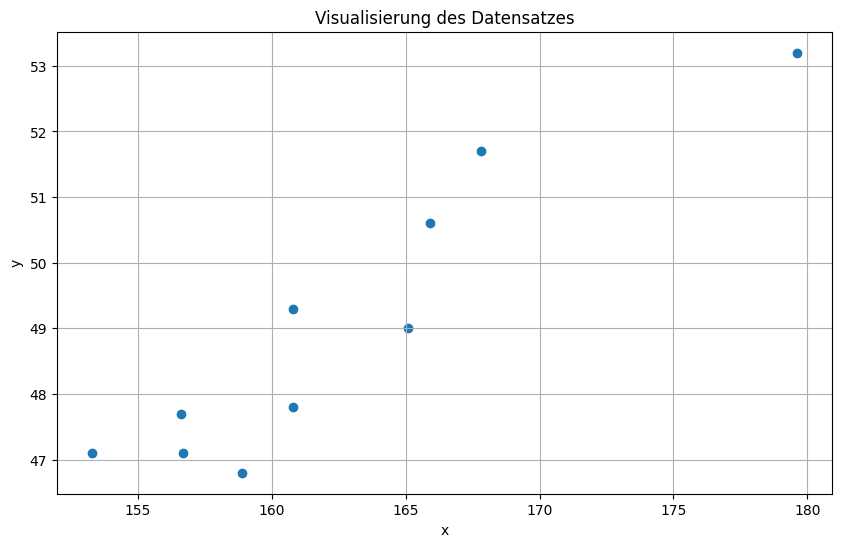

In [23]:
# Datensatz visualisieren
def visualise_datensatz(x,y):
    # Erstellen Sie das Diagramm
    plt.figure(figsize=(10, 6))
    plt.scatter(x,y)
    plt.title('Visualisierung des Datensatzes')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
    
visualise_datensatz(X,y)

## 2 Überwachtes Lernen <a name=2><a>

---
| Type of classification | python method | imports |
| -------- | -------- | -------- |
| **lineare Regression** | clf = LinearRegression().fit(X, Y) | from sklearn.linear_model import LinearRegression |
| **logistische Regression**|
| 1 class | clf = LogisticRegression().fit(X, Y) | from sklearn.linear_model import LogisticRegression |
| Multi-class | clf = LogisticRegression(multi_class='ovr') | from sklearn.linear_model import LogisticRegression |
| **Support Vector Machine**|
| linear SVM        | clf =  SVC(kernel='linear').fit(X, y) | from sklearn.svm import SVC |
| non-linear SVM | clf = SVC(kernel='linear',C=1).fit(X, y) | from sklearn.svm import SVC |
| Kernel SVM | clf = SVC(kernel='rbf',C=1,gamma=1).fit(X, y) | from sklearn.svm import SVC|
| **KNN**|
| KNN-Algorithmus | clf = KNeighborsClassifier(n_neighbors=1).fit(X,y) | from sklearn.neighbors import KNeighborsClassifier |
| Nächste-Nachbarn-Regression | clf = KNeighborsRegressor(n_neighbors=1).fit(X,y) | from sklearn.neighbors import KNeighborsRegressor |
| **Bayes Klassifikation**|
| *Naive Bayes* | clf = GaussianNB().fit(X, y) | from sklearn.naive_bayes import GaussianNB |
| **Entscheidungsbäume**|
| *decision tree* | tree = tree.DecisionTreeClassifier().fit(X, y) | from sklearn import tree |
| *encode describtive values to ordinal* | X_enc = preprocessing.OrdinalEncoder().fit_transform(X) | from sklearn import preprocessing  |


### 2.1. Lineare Regression <a name=2.1.><a>

#### 1. 2D modell <a name=2_1_2D><a>

##### Das optimale linearer Modell berechnen

In [86]:
D = [
    ((153.3), 47.1),
    ((158.9), 46.8),
    ((160.8), 49.3),
    ((179.6), 53.2),
    ((156.6), 47.7),
    ((165.1), 49.0),
    ((165.9), 50.6),
    ((156.7), 47.1),
    ((167.8), 51.7),
    ((160.8), 47.8)
]

# Umwandlung in DataFrame
df = pd.DataFrame(D, columns=['x', 'y'])

# Umwandlung in Numpy Arrays
X = np.array(df['x']).reshape(-1, 1)
y = np.array(df['y']).reshape(-1, 1)

In [19]:
regr = LinearRegression().fit(X,y)
ypts_pred = regr.predict(y)
#y_pred = regr.predict(X)

theta_0 = regr.intercept_[0] #konstante θ0 
theta_koef = regr.coef_[0][0] #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das optimale trainierte Modell ist: h(x) = {theta_0} + {theta_koef}x ")

Das optimale trainierte Modell ist: h(x) = 5.3623451652386365 + 0.2686413708690333x 


##### Evaluation: Datensatz teilen

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regr.fit(X_train,y_train)

LinearRegression()

##### Bestimmtheitsmaß $R^2$-Wert

$R^2(D_{ring} , f)$, $R^2(D^{train}_{ring} , f)$, $R^2(D^{test}_{ring} , f)$

In [74]:

print(f'R²(D): {round(regr.score(X,y),3)}')
print(f'R²(Dtrain): {round(regr.score(X_train, y_train),3)}')
print(f'R²(Dtest): {round(regr.score(X_test, y_test),3)}')


R²(D): 0.767
R²(Dtrain): 0.998
R²(Dtest): 0.082


##### Ridge-Regression


In [83]:
D = [
    ((153.3), 47.1),
    ((158.9), 46.8),
    ((160.8), 49.3),
    ((179.6), 53.2),
    ((156.6), 47.7),
    ((165.1), 49.0),
    ((165.9), 50.6),
    ((156.7), 47.1),
    ((167.8), 51.7),
    ((160.8), 47.8)
]

# Trennen Sie die Merkmale und die Zielwerte
features = np.array([x for (x, y) in D]).reshape(-1, 1)
targets = np.array([y for (x, y) in D])

ridge_regr = Ridge(alpha=0.1).fit(features,targets)
ridge_regr.score(features,targets)

theta_0 = ridge_regr.intercept_ #konstante θ0 
theta_koef = ridge_regr.coef_ #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das optimale Ridge-Regressions Modell ist: h(x) = {round(theta_0,3)} + \n{theta_koef} x\n")
print(f'R²(D): {round(ridge_regr.score(features,targets),3)}')


Das optimale Ridge-Regressions Modell ist: h(x) = 5.371 + 
[0.26858877] x

R²(D): 0.862


##### Polynomische Merkmale + Ridge-Regression


In [70]:
import math

D = [
    ((153.3), 47.1),
    ((158.9), 46.8),
    ((160.8), 49.3),
    ((179.6), 53.2),
    ((156.6), 47.7),
    ((165.1), 49.0),
    ((165.9), 50.6),
    ((156.7), 47.1),
    ((167.8), 51.7),
    ((160.8), 47.8)
]

# Trennen Sie die Merkmale und die Zielwerte
features = np.array([x for (x, y) in D]).reshape(-1, 1)
targets = np.array([y for (x, y) in D])

# Erstellen Sie das PolynomialFeatures-Objekt mit Grad 2
poly = PolynomialFeatures(2)

# Wenden Sie die Transformation auf Ihre Daten an
features_poly = poly.fit_transform(features)

# Jetzt enthält 'features_poly' die polynomiale Merkmalserweiterung von 'features'
print("\nLass die 1 weg:")
print(features_poly)

# Anwendung der math.floor oder math.ceil Funktion auf jede Zahl in jeder Liste
correctly_rounded_data = [[math.floor(number + 0.5) if number >= 0 else math.ceil(number - 0.5) for number in sublist] for sublist in features_poly]

# Ausgabe der korrekt gerundeten Daten
for sublist in correctly_rounded_data:
    print(sublist)

poly_regr = LinearRegression().fit(features_poly,targets)
y_pred = poly_regr.predict(features_poly)

theta_0 = poly_regr.intercept_ #konstante θ0 
theta_koef = poly_regr.coef_ #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das polynomialerweiterte Modell ist: h(x) = {round(theta_0,3)} + \n{theta_koef} x\n")

ridge_regr = Ridge(alpha=0.1).fit(features_poly,targets)
ridge_regr.score(features_poly,targets)

theta_0 = ridge_regr.intercept_ #konstante θ0 
theta_koef = ridge_regr.coef_ #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das optimale Ridge-Regressions Modell ist: h(x) = {round(theta_0,3)} + \n{theta_koef} x\n")

[[1.000000e+00 1.533000e+02 2.350089e+04]
 [1.000000e+00 1.589000e+02 2.524921e+04]
 [1.000000e+00 1.608000e+02 2.585664e+04]
 [1.000000e+00 1.796000e+02 3.225616e+04]
 [1.000000e+00 1.566000e+02 2.452356e+04]
 [1.000000e+00 1.651000e+02 2.725801e+04]
 [1.000000e+00 1.659000e+02 2.752281e+04]
 [1.000000e+00 1.567000e+02 2.455489e+04]
 [1.000000e+00 1.678000e+02 2.815684e+04]
 [1.000000e+00 1.608000e+02 2.585664e+04]]
[1, 153, 23501]
[1, 159, 25249]
[1, 161, 25857]
[1, 180, 32256]
[1, 157, 24524]
[1, 165, 27258]
[1, 166, 27523]
[1, 157, 24555]
[1, 168, 28157]
[1, 161, 25857]
Das optimale trainierte Modell ist: h(x) = -32.058 + 
[ 0.          0.7195757  -0.00135527] x


##### 6. Kreuzvalidierung (engl. cross validation)

In [87]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X, y, cv=3)
scores

array([0.75468997, 0.74975476, 0.77382931])

In [12]:
scores.mean()

0.7594246779223471

#### 2. 3D modell <a name=2_1_3D><a>

##### optimale trainierte Modell 

In [84]:
# Ihr Datensatz
D = [((23,36),0.1),((23,34),0),((26,29),1.2),((21,40),-0.5),((20,33),-1.5),((25,35),0.7)]

# Umwandlung in DataFrame
df = pd.DataFrame(D, columns=['x', 'y'])
df[['x1', 'x2']] = pd.DataFrame(df['x'].tolist(), index=df.index)
df = df.drop('x', axis=1)

X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()#
X

array([[23, 36],
       [23, 34],
       [26, 29],
       [21, 40],
       [20, 33],
       [25, 35]], dtype=int64)

In [64]:
regr = LinearRegression().fit(X,y)
y_pred = regr.predict(X)

theta_0 = regr.intercept_ #konstante θ0 
theta_koef = regr.coef_ #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das optimale trainierte Modell ist: h(x) = {round(theta_0,3)} + {round(theta_koef[0],3)}x1 + {round(theta_koef[1],3)}x2 ")

Das optimale trainierte Modell ist: h(x) = -11.918 + 0.445x1 + 0.049x2 


##### Evaluation: Datensatz teilen

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regr.fit(X_train,y_train)

LinearRegression()

##### Bestimmtheitsmaß $R^2$-Wert

$R^2(D_{ring} , f)$, $R^2(D^{train}_{ring} , f)$, $R^2(D^{test}_{ring} , f)$

In [74]:

print(f'R²(D): {round(regr.score(X,y),3)}')
print(f'R²(Dtrain): {round(regr.score(X_train, y_train),3)}')
print(f'R²(Dtest): {round(regr.score(X_test, y_test),3)}')


R²(D): 0.767
R²(Dtrain): 0.998
R²(Dtest): 0.082


##### Ridge-Regression


In [81]:
D=[((12,7),5.5),((10,8),6),((10,7.5),7),((15,5),6.5),((16,9),7.5),((18,8),10)]

# Trennen Sie die Merkmale und die Zielwerte
features = np.array([x for (x, y) in D])
targets = np.array([y for (x, y) in D])

ridge_regr = Ridge(alpha=0.1).fit(features,targets)
ridge_regr.score(features,targets)

theta_0 = ridge_regr.intercept_ #konstante θ0 
theta_koef = ridge_regr.coef_ #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das optimale Ridge-Regressions Modell ist: h(x) = {round(theta_0,3)} + \n{theta_koef} x\n")

Das optimale Ridge-Regressions Modell ist: h(x) = -0.278 + 
[0.34710592 0.36072884] x



##### Polynomische Merkmale + Ridge-Regression


In [80]:
import math

D=[((12,7),5.5),((10,8),6),((10,7.5),7),((15,5),6.5),((16,9),7.5),((18,8),10)]

# Trennen Sie die Merkmale und die Zielwerte
features = np.array([x for (x, y) in D])
targets = np.array([y for (x, y) in D])

# Erstellen Sie das PolynomialFeatures-Objekt mit Grad 2
poly = PolynomialFeatures(2)

# Wenden Sie die Transformation auf Ihre Daten an
features_poly = poly.fit_transform(features)

# Jetzt enthält 'features_poly' die polynomiale Merkmalserweiterung von 'features'
print("\nLass die 1 weg:")
print(features_poly)

# Anwendung der math.floor oder math.ceil Funktion auf jede Zahl in jeder Liste
correctly_rounded_data = [[math.floor(number + 0.5) if number >= 0 else math.ceil(number - 0.5) for number in sublist] for sublist in features_poly]

# Ausgabe der korrekt gerundeten Daten
for sublist in correctly_rounded_data:
    print(sublist)

poly_regr = LinearRegression().fit(features_poly,targets)
y_pred = poly_regr.predict(features_poly)

theta_0 = poly_regr.intercept_ #konstante θ0 
theta_koef = poly_regr.coef_ #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das polynomialerweiterte Modell ist: h(x) = {round(theta_0,3)} + \n{theta_koef} x\n")

ridge_regr = Ridge(alpha=0.1).fit(features_poly,targets)
ridge_regr.score(features_poly,targets)

theta_0 = ridge_regr.intercept_ #konstante θ0 
theta_koef = ridge_regr.coef_ #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das optimale Ridge-Regressions Modell ist: h(x) = {round(theta_0,3)} + \n{theta_koef} x\n")

[[  1.    12.     7.   144.    84.    49.  ]
 [  1.    10.     8.   100.    80.    64.  ]
 [  1.    10.     7.5  100.    75.    56.25]
 [  1.    15.     5.   225.    75.    25.  ]
 [  1.    16.     9.   256.   144.    81.  ]
 [  1.    18.     8.   324.   144.    64.  ]]
[1, 12, 7, 144, 84, 49]
[1, 10, 8, 100, 80, 64]
[1, 10, 8, 100, 75, 56]
[1, 15, 5, 225, 75, 25]
[1, 16, 9, 256, 144, 81]
[1, 18, 8, 324, 144, 64]
Das polynomialerweiterte Modell ist: h(x) = 113.556 + 
[  0.          -9.56666667 -11.43333333   0.22777778   0.46111111
   0.31111111] x

Das optimale Ridge-Regressions Modell ist: h(x) = 16.685 + 
[ 0.         -2.36485976  0.72373789  0.10866119 -0.03182999 -0.01165762] x



##### 6. Kreuzvalidierung (engl. cross validation)

In [85]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X, y, cv=3)
scores

array([0.384964  , 0.67602274, 0.92823118])

In [12]:
scores.mean()

0.7594246779223471

### 2.2. logistische Regression <a name=2.2.><a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


#### 1. 2D modell <a name=2_2_2D><a>

In [43]:
# Ihre Daten
D = [
    ((5), 0),
    ((14), 1),
    ((10), 1),
    ((7), 1),
    ((2), 0),
    ((1), 0),
    ((9), 1),
    ((8), 0),
    ((3), 0),
    ((13), 1)
]

# Umwandlung in DataFrame
df = pd.DataFrame(D, columns=['x', 'y'])

# Umwandlung in Numpy Arrays
X = np.array(df['x']).reshape(-1, 1)
y = np.array(df['y']).reshape(-1, 1)

In [42]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X,y)
y_predicted = clf.predict(X)

C:\Users\maayo\PycharmProjects\Sem2_ML\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
theta = np.concatenate((clf.intercept_, clf.coef_[0]))
np.round(theta, 3)

array([-5.559,  0.771])

In [45]:
print(f"\nGenauigkeit: {accuracy_score(y, y_predicted):.3f}")
print(f"Präzesion: {precision_score(y, y_predicted, zero_division=0):.3f}")
print(f"Sensitivität (Recall): {recall_score(y, y_predicted, zero_division=0):.3f}")
print(f"F1-Maß: {f1_score(y, y_predicted, zero_division=0):.3f}")

c_matrix = confusion_matrix(y, y_predicted)
print(c_matrix)


Genauigkeit: 0.800
Präzesion: 0.800
Sensitivität (Recall): 0.800
F1-Maß: 0.800
[[4 1]
 [1 4]]


In [47]:
import math
from sklearn.preprocessing import PolynomialFeatures

D=[
  ((5), 0),
    ((14), 1),
    ((10), 1),
    ((7), 1),
    ((2), 0),
    ((1), 0),
    ((9), 1),
    ((8), 0),
    ((3), 0),
    ((13), 1)
]

# Trennen Sie die Merkmale und die Zielwerte
features = np.array([x for (x, y) in D]).reshape(-1, 1)
targets = np.array([y for (x, y) in D])

# Erstellen Sie das PolynomialFeatures-Objekt mit Grad 2
poly = PolynomialFeatures(2)

# Wenden Sie die Transformation auf Ihre Daten an
features_poly = poly.fit_transform(features)

# Jetzt enthält 'features_poly' die polynomiale Merkmalserweiterung von 'features'
print("\nLass die 1 weg:")
print(features_poly)

# Anwendung der math.floor oder math.ceil Funktion auf jede Zahl in jeder Liste
correctly_rounded_data = [[math.floor(number + 0.5) if number >= 0 else math.ceil(number - 0.5) for number in sublist] for sublist in features_poly]

# Ausgabe der korrekt gerundeten Daten
for sublist in correctly_rounded_data:
    print(sublist)

poly_regr = LogisticRegression().fit(features_poly,targets)
y_pred = poly_regr.predict(features_poly)


theta = np.concatenate((poly_regr.intercept_, poly_regr.coef_[0]))
theta = np.round(theta, 3)
print(f"Das polynomialerweiterte Modell ist: h(x) = {theta[0]} + \n{theta[1:]} x\n")

[[  1.   5.  25.]
 [  1.  14. 196.]
 [  1.  10. 100.]
 [  1.   7.  49.]
 [  1.   2.   4.]
 [  1.   1.   1.]
 [  1.   9.  81.]
 [  1.   8.  64.]
 [  1.   3.   9.]
 [  1.  13. 169.]]
[1, 5, 25]
[1, 14, 196]
[1, 10, 100]
[1, 7, 49]
[1, 2, 4]
[1, 1, 1]
[1, 9, 81]
[1, 8, 64]
[1, 3, 9]
[1, 13, 169]
Das polynomialerweiterte Modell ist: h(x) = -4.664 + 
[-0.     0.099  0.07 ] x



#### 2. 3D modell <a name=2_2_3D><a>

In [32]:
# Ihre Daten
D = [
    ((12,11),0),((13,14),1),((11,8),1),((6,2),0),((12,10),0),((7,11),0)
]

# Umwandlung in DataFrame
df = pd.DataFrame(D, columns=['x', 'y'])
df[['x1', 'x2']] = pd.DataFrame(df['x'].tolist(), index=df.index)
df = df.drop('x', axis=1)

X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()#
X

array([[12, 11],
       [13, 14],
       [11,  8],
       [ 6,  2],
       [12, 10],
       [ 7, 11]], dtype=int64)

In [33]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X,y)
y_predicted = clf.predict(X)

In [34]:
theta = np.concatenate((clf.intercept_, clf.coef_[0]))
np.round(theta, 3)

array([-5.806,  0.438,  0.039])

In [35]:
print(f"\nGenauigkeit: {accuracy_score(y, y_predicted):.3f}")
print(f"Präzesion: {precision_score(y, y_predicted, zero_division=0):.3f}")
print(f"Sensitivität (Recall): {recall_score(y, y_predicted, zero_division=0):.3f}")
print(f"F1-Maß: {f1_score(y, y_predicted, zero_division=0):.3f}")

c_matrix = confusion_matrix(y, y_predicted)
print(c_matrix)


Genauigkeit: 0.833
Präzesion: 1.000
Sensitivität (Recall): 0.500
F1-Maß: 0.667
[[4 0]
 [1 1]]


In [40]:
import math
from sklearn.preprocessing import PolynomialFeatures

D=[
((12,11),0),((13,14),1),((11,8),1),((6,2),0),((12,10),0),((7,11),0)
]

# Trennen Sie die Merkmale und die Zielwerte
features = np.array([x for (x, y) in D])
targets = np.array([y for (x, y) in D])

# Erstellen Sie das PolynomialFeatures-Objekt mit Grad 2
poly = PolynomialFeatures(2)

# Wenden Sie die Transformation auf Ihre Daten an
features_poly = poly.fit_transform(features)

# Jetzt enthält 'features_poly' die polynomiale Merkmalserweiterung von 'features'
print("\nLass die 1 weg:")
print(features_poly)

# Anwendung der math.floor oder math.ceil Funktion auf jede Zahl in jeder Liste
correctly_rounded_data = [[math.floor(number + 0.5) if number >= 0 else math.ceil(number - 0.5) for number in sublist] for sublist in features_poly]

# Ausgabe der korrekt gerundeten Daten
for sublist in correctly_rounded_data:
    print(sublist)

poly_regr = LogisticRegression().fit(features_poly,targets)
y_pred = poly_regr.predict(features_poly)


theta = np.concatenate((poly_regr.intercept_, poly_regr.coef_[0]))
theta = np.round(theta, 3)
print(f"Das polynomialerweiterte Modell ist: h(x) = {theta[0]} + \n{theta[1:]} x\n")

[[  1.  12.  11. 144. 132. 121.]
 [  1.  13.  14. 169. 182. 196.]
 [  1.  11.   8. 121.  88.  64.]
 [  1.   6.   2.  36.  12.   4.]
 [  1.  12.  10. 144. 120. 100.]
 [  1.   7.  11.  49.  77. 121.]]
[1, 12, 11, 144, 132, 121]
[1, 13, 14, 169, 182, 196]
[1, 11, 8, 121, 88, 64]
[1, 6, 2, 36, 12, 4]
[1, 12, 10, 144, 120, 100]
[1, 7, 11, 49, 77, 121]
[-1.12646697e+01  1.37983432e-06  6.43561596e-02 -2.01973206e-01
  3.86460861e-01 -6.35349697e-01  3.29889191e-01]
Das polynomialerweiterte Modell ist: h(x) = -11.265 + 
[ 0.     0.064 -0.202  0.386 -0.635  0.33 ] x



#### 3. Mehrklassen: 2D modell <a name=2_2_2D><a>

In [84]:
# Ihre Daten
D = [
    ((0.3),1),((0.24),4),((0.33),2),((0.35),3),((0.39),3),((0.42),1)
]

# Umwandlung in DataFrame
df = pd.DataFrame(D, columns=['x', 'y'])

# Umwandlung in Numpy Arrays
X = np.array(df['x']).reshape(-1, 1)
y = np.array(df['y']).reshape(-1, 1)
np.unique(y)

array([1, 2, 3, 4], dtype=int64)

In [85]:
from sklearn.linear_model import LogisticRegression

# Modell erstellen
clf = LogisticRegression(multi_class='ovr').fit(X, y)
y_predicted = clf.predict(X)

# Modellparameter (Theta) für jede Klasse
thetas = clf.coef_
inter = clf.intercept_

print("Modellparameter (Theta) für jede Klasse:")

for c, theta in enumerate(thetas):
    theta = np.insert(theta, 0, inter[c])
    print(f"Klasse {c+1}: {np.round(theta, 3)}")

# Klassendatensätze erstellen
for e in np.unique(y):
    print("D",e,":", [(x, 1 if y == e else 0) for (x, y) in D])


Modellparameter (Theta) für jede Klasse:
Klasse 1: [-0.708  0.043]
Klasse 2: [-1.607 -0.008]
Klasse 3: [-0.714  0.063]
Klasse 4: [-1.576 -0.098]
D 1 : [(0.3, 1), (0.24, 0), (0.33, 0), (0.35, 0), (0.39, 0), (0.42, 1)]
D 2 : [(0.3, 0), (0.24, 0), (0.33, 1), (0.35, 0), (0.39, 0), (0.42, 0)]
D 3 : [(0.3, 0), (0.24, 0), (0.33, 0), (0.35, 1), (0.39, 1), (0.42, 0)]
D 4 : [(0.3, 0), (0.24, 1), (0.33, 0), (0.35, 0), (0.39, 0), (0.42, 0)]


C:\Users\maayo\PycharmProjects\Sem2_ML\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
print(f"\nGenauigkeit: {accuracy_score(y, y_predicted):.3f}")
print(f"Präzesion: {precision_score(y, y_predicted, zero_division=0, average=None)}")
print(f"Sensitivität (Recall): {recall_score(y, y_predicted, average=None)}")
print(f"F1-Maß: {f1_score(y, y_predicted, average=None)}")

c_matrix = confusion_matrix(y, y_predicted)
print(c_matrix)


Genauigkeit: 0.500
Präzesion: 0.500
Sensitivität (Recall): 0.500
F1-Maß: 0.500
[[1 0 1 0]
 [1 0 0 0]
 [0 0 2 0]
 [1 0 0 0]]


In [89]:
import math
from sklearn.preprocessing import PolynomialFeatures

D = [
    ((0.3),1),((0.24),4),((0.33),2),((0.35),3),((0.39),3),((0.42),1)
]

# Trennen Sie die Merkmale und die Zielwerte
features = np.array([x for (x, y) in D]).reshape(-1, 1)
targets = np.array([y for (x, y) in D])

# Erstellen Sie das PolynomialFeatures-Objekt mit Grad 2
poly = PolynomialFeatures(2)

# Wenden Sie die Transformation auf Ihre Daten an
features_poly = poly.fit_transform(features)

# Jetzt enthält 'features_poly' die polynomiale Merkmalserweiterung von 'features'
print("\nLass die 1 weg:")
print(features_poly)

# Anwendung der math.floor oder math.ceil Funktion auf jede Zahl in jeder Liste
correctly_rounded_data = [[math.floor(number + 0.5) if number >= 0 else math.ceil(number - 0.5) for number in sublist] for sublist in features_poly]

# Ausgabe der korrekt gerundeten Daten
for sublist in correctly_rounded_data:
    print(sublist)


# Modell erstellen
poly_clf = LogisticRegression(multi_class='ovr', max_iter=10000).fit(features_poly, targets)
y_predicted = poly_clf.predict(features_poly)

# Modellparameter (Theta) für jede Klasse
thetas = poly_clf.coef_
inter = poly_clf.intercept_

print("\nModellparameter (Theta) für jede Klasse:")

for c, theta in enumerate(thetas):
    theta = np.insert(theta, 0, inter[c])
    print(f"Klasse {c+1}: {np.round(theta, 3)}")

# Klassendatensätze erstellen
for e in set(targets):
    print("D",e,":", [(x, 1 if y == e else 0) for (x, y) in D])


Lass die 1 weg:
[[1.     0.3    0.09  ]
 [1.     0.24   0.0576]
 [1.     0.33   0.1089]
 [1.     0.35   0.1225]
 [1.     0.39   0.1521]
 [1.     0.42   0.1764]]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]

Modellparameter (Theta) für jede Klasse:
Klasse 1: [-0.711  0.     0.043  0.03 ]
Klasse 2: [-1.606 -0.    -0.008 -0.009]
Klasse 3: [-0.719 -0.     0.063  0.038]
Klasse 4: [-1.569  0.    -0.098 -0.06 ]
D 1 : [(0.3, 1), (0.24, 0), (0.33, 0), (0.35, 0), (0.39, 0), (0.42, 1)]
D 2 : [(0.3, 0), (0.24, 0), (0.33, 1), (0.35, 0), (0.39, 0), (0.42, 0)]
D 3 : [(0.3, 0), (0.24, 0), (0.33, 0), (0.35, 1), (0.39, 1), (0.42, 0)]
D 4 : [(0.3, 0), (0.24, 1), (0.33, 0), (0.35, 0), (0.39, 0), (0.42, 0)]


#### 4. Mehrklassen: 3D modell <a name=2_2_3D><a>

In [73]:
# Ihre Daten
D = [
    ((1,80),2),((20,3),2),((5,0),1),((13,12),1),((60,30),3),((10,40),3)
]

# Umwandlung in DataFrame
df = pd.DataFrame(D, columns=['x', 'y'])
df[['x1', 'x2']] = pd.DataFrame(df['x'].tolist(), index=df.index)
df = df.drop('x', axis=1)

X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()#    

{1, 2, 3}

In [77]:
from sklearn.linear_model import LogisticRegression

# Modell erstellen
clf = LogisticRegression(multi_class='ovr').fit(X, y)
y_predicted = clf.predict(X)

# Modellparameter (Theta) für jede Klasse
thetas = clf.coef_
inter = clf.intercept_

print("Modellparameter (Theta) für jede Klasse:")

for c, theta in enumerate(thetas):
    theta = np.insert(theta, 0, inter[c])
    print(f"Klasse {c+1}: {np.round(theta, 3)}")

# Klassendatensätze erstellen
for e in set(y):
    print("D",e,":", [(x, 1 if y == e else 0) for (x, y) in D])


Modellparameter (Theta) für jede Klasse:
Klasse 1: [14.689 -0.789 -0.246]
Klasse 2: [-0.917 -0.03   0.024]
Klasse 3: [-5.138  0.196  0.053]
D 1 : [((1, 80), 0), ((20, 3), 0), ((5, 0), 1), ((13, 12), 1), ((60, 30), 0), ((10, 40), 0)]
D 2 : [((1, 80), 1), ((20, 3), 1), ((5, 0), 0), ((13, 12), 0), ((60, 30), 0), ((10, 40), 0)]
D 3 : [((1, 80), 0), ((20, 3), 0), ((5, 0), 0), ((13, 12), 0), ((60, 30), 1), ((10, 40), 1)]


In [100]:
print(f"\nGenauigkeit: {accuracy_score(y, y_predicted):.3f}")
print(f"Präzesion: {precision_score(y, y_predicted, zero_division=0, average=None)}")
print(f"Sensitivität (Recall): {recall_score(y, y_predicted, average=None)}")
print(f"F1-Maß: {f1_score(y, y_predicted, average=None)}")

c_matrix = confusion_matrix(y, y_predicted)
print(c_matrix)


Genauigkeit: 0.500
Präzesion: [0.33333333 0.         0.66666667 0.        ]
Sensitivität (Recall): [0.5 0.  1.  0. ]
F1-Maß: [0.4 0.  0.8 0. ]
[[1 0 1 0]
 [1 0 0 0]
 [0 0 2 0]
 [1 0 0 0]]


In [79]:
import math
from sklearn.preprocessing import PolynomialFeatures

D=[
    ((0.3,0.3),1),((0.24,0.26),4),((0.33,0.2),2),((0.35,0.4),3),((0.39,0.38),3),((0.42,0.26),1)
]

# Trennen Sie die Merkmale und die Zielwerte
features = np.array([x for (x, y) in D])
targets = np.array([y for (x, y) in D])

# Erstellen Sie das PolynomialFeatures-Objekt mit Grad 2
poly = PolynomialFeatures(2)

# Wenden Sie die Transformation auf Ihre Daten an
features_poly = poly.fit_transform(features)

# Jetzt enthält 'features_poly' die polynomiale Merkmalserweiterung von 'features'
print("\nLass die 1 weg:")
print(features_poly)

# Anwendung der math.floor oder math.ceil Funktion auf jede Zahl in jeder Liste
correctly_rounded_data = [[math.floor(number + 0.5) if number >= 0 else math.ceil(number - 0.5) for number in sublist] for sublist in features_poly]

# Ausgabe der korrekt gerundeten Daten
for sublist in correctly_rounded_data:
    print(sublist)


# Modell erstellen
poly_clf = LogisticRegression(multi_class='ovr', max_iter=10000).fit(features_poly, targets)
y_predicted = poly_clf.predict(features_poly)

# Modellparameter (Theta) für jede Klasse
thetas = poly_clf.coef_
inter = poly_clf.intercept_

print("\nModellparameter (Theta) für jede Klasse:")

for c, theta in enumerate(thetas):
    theta = np.insert(theta, 0, inter[c])
    print(f"Klasse {c+1}: {np.round(theta, 3)}")

# Klassendatensätze erstellen
for e in set(targets):
    print("D",e,":", [(x, 1 if y == e else 0) for (x, y) in D])


Lass die 1 weg:
[[1.     0.3    0.3    0.09   0.09   0.09  ]
 [1.     0.24   0.26   0.0576 0.0624 0.0676]
 [1.     0.33   0.2    0.1089 0.066  0.04  ]
 [1.     0.35   0.4    0.1225 0.14   0.16  ]
 [1.     0.39   0.38   0.1521 0.1482 0.1444]
 [1.     0.42   0.26   0.1764 0.1092 0.0676]]
[1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0]

Modellparameter (Theta) für jede Klasse:
Klasse 1: [-0.696  0.     0.043 -0.04   0.03  -0.006 -0.032]
Klasse 2: [-1.567  0.    -0.008 -0.099 -0.009 -0.036 -0.055]
Klasse 3: [-0.791  0.     0.062  0.178  0.038  0.082  0.113]
Klasse 4: [-1.551  0.    -0.098 -0.04  -0.06  -0.04  -0.027]
D 1 : [((0.3, 0.3), 1), ((0.24, 0.26), 0), ((0.33, 0.2), 0), ((0.35, 0.4), 0), ((0.39, 0.38), 0), ((0.42, 0.26), 1)]
D 2 : [((0.3, 0.3), 0), ((0.24, 0.26), 0), ((0.33, 0.2), 1), ((0.35, 0.4), 0), ((0.39, 0.38), 0), ((0.42, 0.26), 0)]
D 3 : [((0.3, 0.3), 0), ((0.24, 0.26), 0), ((0.33, 0.2), 0), ((0.35, 0.4), 1),

### 2.3. SVM <a name=2.3.><a>

#### 1. 2D modell <a name=2_2_2D><a>

In [43]:
# Ihre Daten
D = [
    ((5), 0),
    ((14), 1),
    ((10), 1),
    ((7), 1),
    ((2), 0),
    ((1), 0),
    ((9), 1),
    ((8), 0),
    ((3), 0),
    ((13), 1)
]

# Umwandlung in DataFrame
df = pd.DataFrame(D, columns=['x', 'y'])

# Umwandlung in Numpy Arrays
X = np.array(df['x']).reshape(-1, 1)
y = np.array(df['y']).reshape(-1, 1)

In [42]:
from sklearn import svm

# Erstellen und Trainieren des Modells
clf = svm.SVC(kernel='linear').fit(X, y)

theta = clf.coef_
b = clf.intercept_
# Ausgabe der Parameter
print("Theta: ", np.round(theta, 3))
print("b: ", np.round(b, 3))

C:\Users\maayo\PycharmProjects\Sem2_ML\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 2. Soft-Margin - 3D modell <a name=2_2_3D><a>

In [81]:
# Ihre Daten
import pandas as pd
import numpy as np

D = [
    ((2,7),-1),((7.5,0.5),-1),((3,3.3),-1),((2.5,7.5),1),((4,3.8),1),((5,2),1)
]

C = 1

# Umwandlung in DataFrame
df = pd.DataFrame(D, columns=['x', 'y'])
df[['x1', 'x2']] = pd.DataFrame(df['x'].tolist(), index=df.index)
df = df.drop('x', axis=1)

X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()#

In [83]:
from sklearn import svm

# Erstellen und Trainieren des Modells
clf = svm.SVC(kernel='linear').fit(X, y)

theta = clf.coef_
b = clf.intercept_
# Ausgabe der Parameter
print("Theta: ", np.round(theta, 3))
print("b: (achte auf den minus zeichen)", np.round(b, 3))

Theta:  [[0.32  0.515]]
b: (achte auf den minus zeichen) [-3.659]


In [84]:
print("Supportvektoren: ", clf.support_vectors_)

Supportvektoren:  [[2.  7. ]
 [7.5 0.5]
 [3.  3.3]
 [2.5 7.5]
 [4.  3.8]
 [5.  2. ]]


#### 4. Kernelfunktion: 3D modell <a name=2_2_3D><a>

In [90]:
# Ihre Daten
D_train = [
   ((8.7,16.5),1),((10.8,14.8),1),((12,16.7),1),((12.2,12.2),1),((16.5,13),-1),((5.8,23.5),-1)
]

D_test = [
    ((13,12.5),1),((6.2,21.3),-1),((6,25.8),1),((8.5,27.7),-1)
]

# Umwandlung in DataFrame
df_train = pd.DataFrame(D_train, columns=['x', 'y'])
df_train[['x1', 'x2']] = pd.DataFrame(df_train['x'].tolist(), index=df_train.index)
df_train = df_train.drop('x', axis=1)

X_train = df_train[['x1', 'x2']].to_numpy()
y_train = df_train['y'].to_numpy()#

# Umwandlung in DataFrame
df_test = pd.DataFrame(D_test, columns=['x', 'y'])
df_test[['x1', 'x2']] = pd.DataFrame(df_test['x'].tolist(), index=df_test.index)
df_test = df_test.drop('x', axis=1)

X_test = df_test[['x1', 'x2']].to_numpy()
y_test = df_test['y'].to_numpy()#

#####  Plotten Sie den Datensatz $D^{train}$

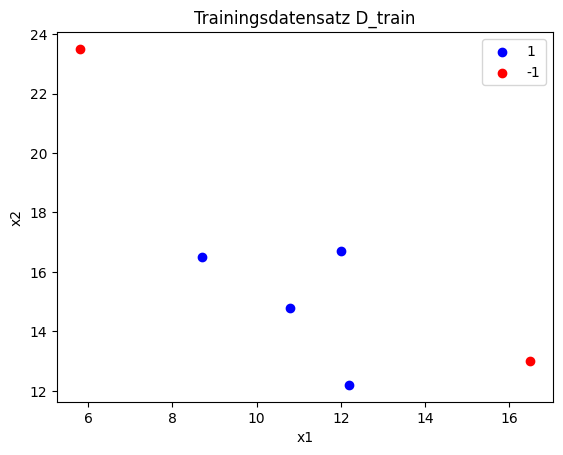

In [91]:
import matplotlib.pyplot as plt

# Datenpunkte für jede Klasse extrahieren
class_1 = df_train[df_train['y'] == 1]
class_minus_1 = df_train[df_train['y'] == -1]

# Datenpunkte plotten
plt.scatter(class_1['x1'], class_1['x2'], color='b', label='1')
plt.scatter(class_minus_1['x1'], class_minus_1['x2'], color='r', label='-1')

# Diagramm beschriften
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Trainingsdatensatz D_train')
plt.show()


##### Was ist die geeignete Kernel-Funktion für diese Daten? rbf, poly, inhomogene poly?


In [92]:
from sklearn import svm

# Erstellen und Trainieren des Modells
clf = svm.SVC(kernel='rbf').fit(X_train, y_train)
y_predicted = clf.predict(X_test)
#clf = svm.SVC(kernel='poly', degree=d, coef0=r).fit(X, y)
#clf = svm.SVC(kernel='linear', C=1.0).fit(X_train, y_train)
#clf = svm.SVC(kernel='rbf', C=1, gamma=1).fit(X_train, y_train)

# Ausgabe der Supportvektoren
print("Supportvektoren: ", clf.support_vectors_)

Supportvektoren:  [[16.5 13. ]
 [ 5.8 23.5]
 [ 8.7 16.5]
 [12.  16.7]
 [12.2 12.2]]


In [94]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(f"\nGenauigkeit: {accuracy_score(y_test, y_predicted):.3f}")
print(f"Präzesion: {precision_score(y_test, y_predicted, zero_division=0):.3f}")
print(f"Sensitivität (Recall): {recall_score(y_test, y_predicted, zero_division=0):.3f}")
print(f"F1-Maß: {f1_score(y_test, y_predicted, zero_division=0):.3f}")


Genauigkeit: 0.750
Präzesion: 1.000
Sensitivität (Recall): 0.500
F1-Maß: 0.667


### 2.4. KNN <a name=2.4.><a>

#####  KNN algorithmus

In [133]:
D = [
   ((14.26,18.98),1),((9.45,8.61),1),((7.53,-0.7),1),((15.62,4.92),2),((17.47,-8.43),2),((6.66,-5.27),3)
]
k=1

# Umwandlung in DataFrame
df = pd.DataFrame(D, columns=['x', 'y'])
df[['x1', 'x2']] = pd.DataFrame(df['x'].tolist(), index=df.index)
df = df.drop('x', axis=1)

X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()#

In [134]:
from sklearn.neighbors import KNeighborsClassifier

# Ihr Punkt
x7 = np.array([13.92,-1.76])
k=5


knn = KNeighborsClassifier(n_neighbors=k).fit(X, y)

# Vorhersage der Klasse für x7
prediction = knn.predict(X)
print(f"Die vorhergesagte Klassen ist {prediction}")

# Vorhersage der Klasse für x7
prediction = knn.predict([x7])
print(f"Die vorhergesagte Klasse für x7 ist {prediction}")


Die vorhergesagte Klassen ist [1 1 1 1 1 1]
Die vorhergesagte Klasse für x7 ist [1]


#####  KNN - Regression

In [131]:
D = [
   ((3.1,4.1),5.9),((2.6,5.3),5.8),((9.7,9.3),2.3),((8.4,6.2),6.4),((3.3,8.3),2.7),((9.5,0.2),8.8)
]
k=1

# Umwandlung in DataFrame
df = pd.DataFrame(D, columns=['x', 'y'])
df[['x1', 'x2']] = pd.DataFrame(df['x'].tolist(), index=df.index)
df = df.drop('x', axis=1)

X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()#

In [132]:
from sklearn.neighbors import KNeighborsRegressor

x7 = np.array([4.1, 9.7])
k = 3

# Erstellen Sie den KNN Regressor
knn = KNeighborsRegressor(n_neighbors=3).fit(X, y)
prediction = knn.predict([x7])
print(f"Die vorhergesagte Klasse für x7 ist {prediction}")
round(prediction[0], 3)

Die vorhergesagte Klasse für x7 ist [4.96666667]


4.967

#####  z-transformation

In [100]:
D = [
   ((9.8,40.29),1),((-0.1,37.54),1),((-18.46,46.52),1),((-30.33,22.56),2),((12.51,30.13),2),((36.45,13.2),3)
]
k=3

# Umwandlung in DataFrame
df = pd.DataFrame(D, columns=['x', 'y'])
df[['x1', 'x2']] = pd.DataFrame(df['x'].tolist(), index=df.index)
df = df.drop('x', axis=1)

X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()#

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

z_transformed_data = scaler.fit_transform(X)
# Runden Sie die Werte auf die dritte Stelle
z_transformed_data = np.round(z_transformed_data, 3)

# Kombinieren Sie die transformierten Daten mit den Labels
# Konvertieren Sie die transformierten Daten in eine Liste von Tupeln
z_transformed_data = [tuple(row) for row in z_transformed_data]

# Kombinieren Sie die transformierten Daten mit den Labels
D_transformed = [(data, label) for data, label in zip(z_transformed_data, y)]

D_transformed

[((0.376, 0.765), 1),
 ((-0.08, 0.52), 1),
 ((-0.926, 1.32), 1),
 ((-1.473, -0.815), 2),
 ((0.501, -0.14), 2),
 ((1.604, -1.649), 3)]

In [109]:
from sklearn.neighbors import KNeighborsClassifier

# Ihr Punkt
x7 = np.array([-4.2, 21.45])
k = 3

# Z-Transformation von x7
x7_transformed = scaler.transform([x7])
x7_transformed = np.round(x7_transformed, 3)

# Erstellen Sie den KNN Klassifikator und Trainieren Sie den Klassifikator mit den z-transformierten Daten und den Labels
knn = KNeighborsClassifier(n_neighbors=k).fit(z_transformed_data, y)

# Vorhersage der Klasse für x7
prediction = knn.predict(x7_transformed)
print(prediction)
print(f"Die vorhergesagte Klasse für x7 ist {prediction[0]}")


[2]
Die vorhergesagte Klasse für x7 ist 2


### 2.5. Bayes <a name=2.5.><a>

#####  Naive Bayes

In [135]:
from sklearn.naive_bayes import GaussianNB

# Definieren Sie den Datensatz D
D = [((0,50),0),((1,200),2),((2,200),1),((0,100),1),((1,50),0),((0,200),2)]

# Trennen Sie die Merkmale und die Zielvariable
X = [d[0] for d in D]
y = [d[1] for d in D]

# Erstellen Sie den Naive Bayes Klassifikator
clf = GaussianNB().fit(X, y)

# Definieren Sie den Punkt x7
x7 = [[2, 50]]

# Klassifizieren Sie den Punkt x7
pred = clf.predict(x7)

print(f'Der Punkt x7=(2,50) wird der Klasse {pred[0]} zugeordnet.')


Der Punkt x7=(2,50) wird der Klasse 0 zugeordnet.


In [136]:
from sklearn.naive_bayes import GaussianNB

# Definieren Sie den Trainingsdatensatz Dtrain
Dtrain = [((1.29,-1.83),1),((0.76,-0.95),1),((5.24,-1.59),0),((8.74,-0.27),0),((2.77,-2.23),0),((1.24,-1.65),1)]

# Trennen Sie die Merkmale und die Zielvariable
X_train = [d[0] for d in Dtrain]
y_train = [d[1] for d in Dtrain]

# Definieren Sie den Testdatensatz Dtest
Dtest = [((0.62,-1.58),1),((6.82,0.07),0),((2.64,-0.15),1),((3.23,-1.58),0)]

# Trennen Sie die Merkmale und die Zielvariable
X_test = [d[0] for d in Dtest]
y_test = [d[1] for d in Dtest]

# Erstellen Sie den Naive Bayes Klassifikator
clf = GaussianNB()

# Trainieren Sie den Klassifikator mit dem Trainingsdatensatz Dtrain
clf.fit(X_train, y_train)

# Klassifizieren Sie den Testdatensatz Dtest
y_pred = clf.predict(X_test)

# Ausgabe der Ergebnisse
print(f'clf(Dtest) = {y_pred}')


clf(Dtest) = [1 0 0 0]


In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Berechnen Sie die Metriken
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
sensitivity = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Ausgabe der Ergebnisse
print(f'Genauigkeit (Accuracy): {accuracy}')
print(f'Präzision (Precision): {precision}')
print(f'Sensitivität (Recall): {sensitivity}')
print(f'F1-Score: {f1}')


Genauigkeit (Accuracy): 0.75
Präzision (Precision): [0.66666667 1.        ]
Sensitivität (Recall): [1.  0.5]
F1-Score: [0.8        0.66666667]


---
## 5.3. RNN <a name=5.1.><a>

### 5.3.1. spaltenweise Konkatenation zweier Matrizen <a name=5.3.1.><a>

Sei $A \in \mathbb{R}^{n \times m}$ und $B \in \mathbb{R}^{n \times m'}$ zwei Matrizen mit gleicher Anzahl an Zeilen, so ist $A \circ B \in \mathbb{R}^{n \times (m + m')}$ die entsprechende Konkatenation:

In [ ]:
# Erstellen Sie die Matrizen A und B mit Dummy-Zahlen
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])

B = np.array([[10, 11, 12], 
              [13, 14, 15], 
              [16, 17, 18]])

# Führen Sie die Konkatenation durch
AB = np.concatenate((A, B), axis=1)
print(AB)

# Erstellen Sie die Vektoren v und w mit Dummy-Zahlen
v = np.array([1, 2, 3])  # v = (v1, ..., vm)^T
w = np.array([4, 5, 6])  # w = (w1, ..., wm')^T

# Führen Sie die Konkatenation durch
vw = np.concatenate((v, w))
print("v ◦ w =", vw)

Vergewissern Sie sich, dass für die obigen Definition gilt $(A \circ B)(v \circ w) = Av + Bw$.

In [ ]:
result1 = np.dot(AB,vw)
result2 = np.dot(A,v) + np.dot(B,w)
print(result1 == result2)

### 5.3.2. One-Hot-Codierung <a name=5.3.2.><a>


Sei ein Alphabet gegeben durch

Σ={a,e,s,t}

1. Bestimmen Sie eine One-Hot-Codierung für Σ
. (Anwortformat '(1,2,3,4,5,6)', Vektorlänge ist selbst zu wä
2. Wie ist demnach das Wort test
 codiert 

(Anwortformat '((1,2,3,4,5,6),(7,8,9))')
#### Lösung
- a: (1, 0, 0, 0)
- e: (0, 1, 0, 0)
- s: (0, 0, 1, 0)
- t: (0, 0, 0, 1)

Unter Verwendung der zuvor definierten One-Hot-Codierung für das Alphabet Σ={a,e,s,t}, wird das Wort "test" wie folgt codiert:

- t: (0, 0, 0, 1)
- e: (0, 1, 0, 0)
- s: (0, 0, 1, 0)
- t: (0, 0, 0, 1)

Daher ist die Codierung des Wortes "test" in dem von Ihnen angegebenen Antwortformat:

((0, 0, 0, 1), (0, 1, 0, 0), (0, 0, 1, 0), (0, 0, 0, 1))

### 5.3.3. Berechnungsgraphen <a name=5.3.3.><a>
Im Allgemeinen gilt für eine Eingabe $x = (x^{(1)}, \ldots, x^{(m)})$:

$$
h(i) = \text{act}(Ux^{(i)} + Wh^{(i-1)}) \quad \text{(1)}
$$ <a name=hi><a>

$$
o(i) = \text{act}(Vh^{(i)}) \quad \text{(2)}
$$<a name=oi><a>

für $i = 1, \ldots, m$. Zu beachten ist, dass diese Netzwerkarchitektur mit Eingaben beliebiger Länge umgehen kann, aber eine fixe Anzahl an Parametern besitzt (in den Matrizen $U$, $V$, $W$).

Gegeben sei das abgebildete einfache RNN, wobei

$$\sum = \{\text{ist,nichts,niemand}\} = \{(1,0,0)^T,(0,1,0)^T,(0,0,1)^T\}$$
$$U= ((0, 0.9, 0.9), (0.5, 0.1, 0), (0.5, 0, 0.1))$$
$$W = ((0, 0.45, 0.45), (0.25, 0.05, 0), (0.25, 0, 0.05))$$
$$V = ((0.5, 0, 0), (0, 0.5, 0), (0, 0, 0.5))$$
$$h_0 = (0,1,1)^T$$

und die Aktivierungsfunktion $h^{relu}$ ist. Berechnen Sie die hidden states und die Ausgabe für die Eingabe $x = \text{'Niemand ist'} = ((0,0,1)^T,(1,0,0)^T)$. 
(Antwortformat '(1,2,3.456)')

In [ ]:
import numpy as np

def hrelu(x):
    return np.maximum(0, x)

U = np.array([[0, 0.9, 0.9], [0.5, 0.1, 0], [0.5, 0, 0.1]])
W = np.array([[0, 0.45, 0.45], [0.25, 0.05, 0], [0.25, 0, 0.05]])
V = np.array([[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.5]])
h_0 = np.array([0,1,1]).T
x = np.array([[0,0,1],[1,0,0]]).T

h_1 = hrelu(np.dot(U, x[:,0]) + np.dot(W, h_0))
h_2 = hrelu(np.dot(U, x[:,1]) + np.dot(W, h_1))

o_1 = hrelu(np.dot(V, h_1))
o_2 = hrelu(np.dot(V, h_2))

print("h_1: ", h_1)
print("h_2: ", h_2)
print("o_1: ", o_1)
print("o_2: ", o_2)


### 5.3.4. Long short-term memory-Netzwerke <a name=5.3.4.><a>


$$f^{(i)} = h^{logit} (U^f x^{(i)} + W^f h^{(i−1)})$$
- Der Vektor $f^{(i)}$ soll steuern, was aus dem Langzeitgedächtnis `s` vergessen werden soll (auch als **forget gate** bezeichnet).

$$g^{(i)} = h^{logit} (U^g x^{(i)} + W^g h^{(i−1)})$$
$$k^{(i)} = h^{tanh} (U^k x^{(i)} + W^k h^{(i−1)})$$
- Der Vektor $g^{(i)}$ (**input gate**) steuert, welche Informationen aus $k^{(i)}$ in das Langzeitgedächtnis aufgenommen werden sollen.
$$q^{(i)} = h^{logit} (U^o x^{(i)} + W^o h^{(i−1)})$$
- Der Vektor $q^{(i)}$ (**output gate**) steuert, welche Information in die Ausgabe und den nächsten versteckten Zustand $h^{(i)}$ einfließt.

- Die Kernidee hinter LSTMs liegt in der Definition des Zellzustands: $$s^{(i)} = f^{(i)} \cdot s^{(i-1)} + g^{(i)} \cdot k^{(i)}$$